null hypothesis examples

single sample

In [3]:
import pandas as pd
from scipy import stats

df = pd.read_csv('Dataset/Ages.csv')
#p-value is the probability of observing the data given that the null hypothesis is true
# Null Hypothesis: The mean age of the population is 30
print(df.head())
t_statistic, p_value = stats.ttest_1samp(df['ages'], 30)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
# If p-value < 0.05, we reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: The mean age is significantly different from 30.")
else:
    print("Fail to reject the null hypothesis: The mean age is not significantly different from 30.")
# Output the mean age for reference
mean_age = df['ages'].mean()
print(f'Mean Age: {mean_age}')


   ages
0    34
1    45
2    65
3    78
4    32
T-statistic: 2.8550527233384186
P-value: 0.01012962422249864
Reject the null hypothesis: The mean age is significantly different from 30.
Mean Age: 43.75


In [4]:
df = pd.read_csv('Dataset/blood_pressure.csv')
df.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


2 samples

In [5]:
# Perform a two-sample t-test to compare the means of two independent groups
t_statistic, p_value = stats.ttest_ind(df['bp_before'], df['bp_after'])
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
# If p-value < 0.05, we reject the null hypothesis that the means are equal
if p_value < 0.05:
    print("Reject the null hypothesis: The means of blood pressure before and after treatment are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means of blood pressure before and after treatment are not significantly different.")
# Output the means for reference


T-statistic: 3.0669836819036274
P-value: 0.002412277478078891
Reject the null hypothesis: The means of blood pressure before and after treatment are significantly different.


independent 2 samples

In [6]:
df = pd.read_csv('Dataset/employee_satisfaction.csv')
df.head()
#perdorm a 2 sample t-test to compare the means of two independent groups


,EmployeeID,Satisfaction_Score,Department
0,1,45,Marketing
1,2,48,Marketing
2,3,65,Marketing
3,4,68,Marketing
4,5,68,Sales


In [9]:
#perdorm a 2 sample t-test to compare the means of two independent Departments Marketing and Sales
t_statistic, p_value = stats.ttest_ind(df[df['Department'] == 'Marketing']['Satisfaction_Score'],
                                       df[df['Department'] == 'Sales']['Satisfaction_Score'])
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
# If p-value < 0.05, we reject the null hypothesis that the means are equal
if p_value < 0.05:
    print("Reject the null hypothesis: The means of employee satisfaction in Marketing and Sales are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means of employee satisfaction in Marketing and Sales are not significantly different.")
# Output the means for reference
mean_marketing = df[df['Department'] == 'Marketing']['Satisfaction_Score'].mean()
mean_sales = df[df['Department'] == 'Sales']['Satisfaction_Score'].mean()
print(f'Mean Satisfaction in Marketing: {mean_marketing}')
print(f'Mean Satisfaction in Sales: {mean_sales}')


T-statistic: 0.12632332074774358
P-value: 0.8997348065487794
Fail to reject the null hypothesis: The means of employee satisfaction in Marketing and Sales are not significantly different.
Mean Satisfaction in Marketing: 49.63636363636363
Mean Satisfaction in Sales: 48.910714285714285


z test

In [63]:
# import the libraries
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

# Generate a random array of 50 numbers having mean 110 and standard deviation of 15
# similar to the IQ scores data
mean_iq = 110
sd_iq = 15  # true population standard deviation of IQ scores
alpha =0.05
null_mean =100
data = sd_iq*randn(50)+mean_iq
# Print mean and SD
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))

# Now you perform the test, and in this function, you passed data in the value parameter
# You passed mean value in the null hypothesis and will check if the mean is larger in the
# alternative hypothesis

ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# The function outputs a p_value and z-score corresponding to that value, you compare the
# p-value with alpha, and if it is greater than alpha, then you do fail to reject the null hypothesis else you reject it.

# Print the p-value and alpha
alpha = 0.05
print('p_value=%.10f' % (p_value), 'alpha=%.10f' % (alpha))

# print the z-score
print('z-score=%.2f' % (ztest_Score))   


if(p_value < alpha):
    print("Reject null Hypothesis")
else:
    print("Fail to Reject null Hypothesis")

mean=112.02 stdv=14.92
p_value=0.0000000086 alpha=0.0500000000
z-score=5.64
Reject null Hypothesis


chi distribution

In [65]:
from scipy.stats import chi2_contingency
import numpy as np

data = np.array([[10, 20, 30], [6, 9, 17]])

chi2, p_value, dof, expected = chi2_contingency(data)
print(f'Chi2 Statistic: {chi2}')
print(f'P-value: {p_value}')
# If p-value < 0.05, we reject the null hypothesis that the distributions are independent
if p_value < 0.05:
    print("Reject the null hypothesis: The distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: The distributions are not significantly different.")



Chi2 Statistic: 0.27157465150403504
P-value: 0.873028283380073
Fail to reject the null hypothesis: The distributions are not significantly different.


In [66]:
# More dramatic snack choice differences
data = [[10, 20, 30],   # Greenwood
        [ 9,  1,  8]]   # Riverdale

stat, p_value, dof, expected = chi2_contingency(data)

print("p-value:", p_value)
if p_value < 0.05:
    print("Reject null hypothesis - significant relationship exists.")
else:
    print("Fail to reject null hypothesis - no significant relationship.")


p-value: 0.005595003173072841
Reject null hypothesis - significant relationship exists.


### __12.1 Chi-Square Test and Independence Test__

In [67]:
import numpy as np
from scipy.stats import chi2_contingency

# Contingency table (observed counts)
data = np.array([
    [10, 5, 15],   # Age 18–29
    [10, 15, 5],   # Age 30–49
    [5, 20, 5]     # Age 50+
])

# Perform chi-square test of independence
stat, p_value, dof, expected = chi2_contingency(data)

# Print results
print(f"Chi-Square Statistic = {stat:.2f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p_value:.4f}")

if p_value < 0.05:
    print("Reject null hypothesis - social media preference depends on age group.")
else:
    print("Fail to reject null hypothesis - no significant relationship.")


Chi-Square Statistic = 18.75
Degrees of Freedom = 4
P-value = 0.0009
Reject null hypothesis - social media preference depends on age group.


### ANOVA

one way anova

In [71]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
df = pd.read_csv('Dataset/plant.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()


,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


In [72]:
df['group'].value_counts()

group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64

In [73]:
df.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


In [74]:
df = df[['weight','group']]
groups = pd.unique(df.group.values)
data = {grp:df['weight'][df.group == grp] for grp in groups}

F, p = stats.f_oneway(data['ctrl'], data['trt1'], data['trt2'])
print("p-value for significance is: ", p)
if p<0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value for significance is:  0.015909958325622895
Reject the null hypothesis


2 way anova

In [75]:
# Import the necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the crop_yield.csv dataset
df_anova2 = pd.read_csv("Dataset/crop_yield.csv")
df_anova2.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [76]:
df_anova2[['Fert', 'Water']].value_counts()

Fert  Water
A     High     5
      Low      5
B     High     5
      Low      5
Name: count, dtype: int64

In [77]:
df_anova2.describe()

,Yield
count,20.000000
mean,29.040000
std,4.230516
min,19.400000
25%,26.400000
50%,29.600000
75%,32.400000
max,35.200000


In [78]:
# Fit the model
model = ols('Yield ~ C(Fert)*C(Water)', df_anova2).fit()

# Print the overall model
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# Perform ANOVA and print the table
res = sm.stats.anova_lm(model, typ= 2) # ANOVA 2-way
print('\n', res)

Overall model F( 3, 16) =  4.112, p =  0.0243

                    sum_sq    df         F    PR(>F)
C(Fert)            69.192   1.0  5.766000  0.028847
C(Water)           63.368   1.0  5.280667  0.035386
C(Fert):C(Water)   15.488   1.0  1.290667  0.272656
Residual          192.000  16.0       NaN       NaN


In [83]:
df_anova2['Residual']=model.resid

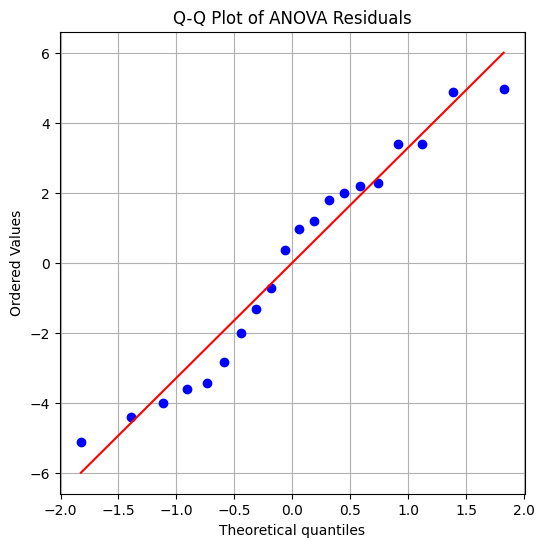

In [84]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot of residuals from the model
plt.figure(figsize=(6, 6))
stats.probplot(df_anova2['Residual'], dist="norm", plot=plt)
plt.title("Q-Q Plot of ANOVA Residuals")
plt.grid(True)
plt.show()

### F-Distribution

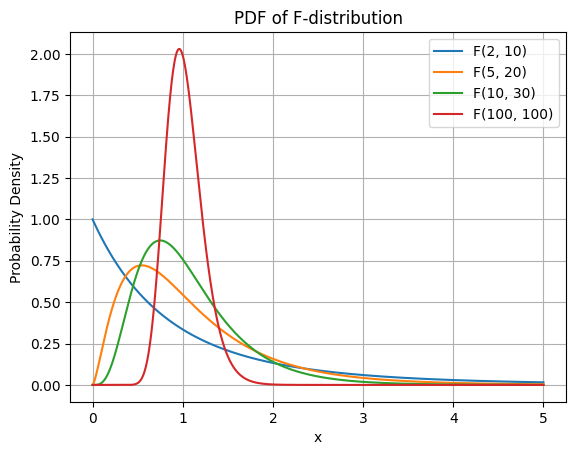

In [91]:
#pdf of F-distribution
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the F-distribution
dof1 = 2  # degrees of freedom for the numerator
dof2 = 10  # degrees of freedom for the denominator

x = np.linspace(0, 5, 1000)
# Calculate the PDF of the F-distribution
for dof1, dof2 in [(2, 10), (5, 20), (10, 30), (100,100)]:
    pdf = stats.f.pdf(x, dof1, dof2)
    # Plot the PDF
    plt.plot(x, pdf, label=f'F({dof1}, {dof2})')
plt.title('PDF of F-distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()


##  F-Test for Equality of Variances

same Variance

In [131]:
import random
from scipy.stats import f
random.seed()

# Generate data with same std
x = np.array([random.gauss(100,15) for x in range(20)])
y = np.array([random.gauss(100,15) for x in range(20)])

# Calculate f_test_statistic
f_test_stat = np.var(x,ddof=1) / np.var(y,ddof = 1)

dfn = x.size - 1
dfd = y.size - 1

# Calculate p value
p_value = 1 - f.cdf(f_test_stat,dfn,dfd)

print(p_value)
# Print the F-test statistic and p-value
print(f'F-test Statistic: {f_test_stat}')
print(f'P-value: {p_value}')
# Determine if we reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: The variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: The variances are not significantly different.")
# Import the necessary libraries

0.0007903766695266379
F-test Statistic: 4.639735225275414
P-value: 0.0007903766695266379
Reject the null hypothesis: The variances are significantly different.


## __Exercise: Determine the Percentage of Defective User Data__

In [133]:
import scipy as sp


In [134]:
customer = pd.read_csv('Dataset/Customer+OrderForm.csv')
customer.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [135]:
customer.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [136]:
customer_cleaned = customer.dropna()
customer_cleaned.describe()


,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [145]:
customer_categories = customer_cleaned['India'].value_counts()
# create a table for the catagories across  Phillippines,Indonesia,Malta,India countries, dont use cross tabulation
table = pd.DataFrame({
    'Phillippines': [customer_cleaned['Phillippines'].value_counts().get('Error Free', 0),
                     customer_cleaned['Phillippines'].value_counts().get('Defective', 0)],
    'Indonesia': [customer_cleaned['Indonesia'].value_counts().get('Error Free', 0),
                  customer_cleaned['Indonesia'].value_counts().get('Defective', 0)],
    'Malta': [customer_cleaned['Malta'].value_counts().get('Error Free', 0),
              customer_cleaned['Malta'].value_counts().get('Defective', 0)],
    'India': [customer_cleaned['India'].value_counts().get('Error Free', 0),
              customer_cleaned['India'].value_counts().get('Defective', 0)]
}, index=['Error Free', 'Defective'])
print(table)




            Phillippines  Indonesia  Malta  India
Error Free           271        267    269    280
Defective             29         33     31     20


In [148]:
#categorical variables
from scipy.stats import chi2_contingency
# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(table)
print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of Freedom: {dof}')
# If p-value < 0.05, we reject the null hypothesis that the distributions are independent
if p_value < 0.05:
    print("Reject the null hypothesis: The distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: The distributions are not significantly different.")


Chi-Square Statistic: 3.858960685820355
P-value: 0.2771020991233135
Degrees of Freedom: 3
Fail to reject the null hypothesis: The distributions are not significantly different.
